# Describing Data

### What do you find in this notebook?

In this exercise, first, you will familiarize yourself with the Python libraries 'statsmodels' and 'SciPy' that let you do statistical analysis: calculate descriptive statistics, sample datapoints, study relationships between variables, and perform hypothesis testing. Then, second, you will work on a set of exercises that will let you practice your skills.

Here we show a couple of examples of how to do common analyses, but there are many more useful probability distributions and statistical tests. In the linked documentation, you will find complete information, and a lot more details compared to what is outlined in this notebook:
- [statsmodels](https://www.statsmodels.org/stable/examples/index.html), [more complete documentation](https://www.statsmodels.org/stable/stats.html)
- [SciPy](https://docs.scipy.org/doc/scipy/reference/stats.html)

# Tutorial: How to use the libraries

- You will be working with the full US 2015 census dataset (acs2015_county_data.csv, available at https://www.kaggle.com/muonneutrino/us-census-demographic-data#acs2015_county_data.csv). Here we load it. Take some time to familiarize yourself with the contents. One row represents one county.

In [2]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ----- ---------------------------------- 1.3/9.9 MB 7.4 MB/s eta 0:00:02
   ----------- ---------------------------- 2.9/9.9 MB 8.0 MB/s eta 0:00:01
   -------------------- ------------------- 5.0/9.9 MB 8.4 MB/s eta 0:00:01
   --------------------------- ------------ 6.8/9.9 MB 8.4 MB/s eta 0:00:01
   -------------------------------- ------- 8.1/9.9 MB 8.1 MB/s eta 0:00:01
   ---------------------------------------  9.7/9.9 MB 8.2 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 7.9 MB/s eta 0:00:00


In [3]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

#load the statistical libraries
from statsmodels.stats import diagnostic
from scipy import stats

In [4]:
data_folder = './data/'
df = pd.read_csv(data_folder + 'acs2015_county_data.csv')

In [5]:
df.columns

Index(['CensusId', 'State', 'County', 'TotalPop', 'Men', 'Women', 'Hispanic',
       'White', 'Black', 'Native', 'Asian', 'Pacific', 'Citizen', 'Income',
       'IncomeErr', 'IncomePerCap', 'IncomePerCapErr', 'Poverty',
       'ChildPoverty', 'Professional', 'Service', 'Office', 'Construction',
       'Production', 'Drive', 'Carpool', 'Transit', 'Walk', 'OtherTransp',
       'WorkAtHome', 'MeanCommute', 'Employed', 'PrivateWork', 'PublicWork',
       'SelfEmployed', 'FamilyWork', 'Unemployment'],
      dtype='object')

In [6]:
df.sample(10)

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
2962,53019,Washington,Ferry,7652,3987,3665,4.0,74.1,0.3,15.2,...,11.7,1.5,6.2,21.1,2452,52.4,40.6,6.4,0.5,12.2
371,12103,Florida,Pinellas,931477,446740,484737,8.7,75.5,10.1,0.3,...,1.6,2.7,5.5,23.9,423351,83.7,10.9,5.2,0.2,8.4
1976,37173,North Carolina,Swain,14163,6808,7355,2.4,64.0,1.5,26.1,...,1.4,0.9,1.6,19.6,5543,68.8,24.0,7.1,0.0,7.7
1028,21071,Kentucky,Floyd,38649,19048,19601,0.7,97.4,0.8,0.1,...,1.6,0.5,1.7,24.6,11922,71.2,22.3,6.4,0.0,9.7
331,12023,Florida,Columbia,67806,35080,32726,5.4,73.4,17.7,0.3,...,0.9,1.6,3.1,24.2,25226,71.5,24.0,4.4,0.1,14.8
182,5143,Arkansas,Washington,216432,108144,108288,16.0,72.5,3.2,0.9,...,2.5,1.3,4.6,21.3,102944,78.7,14.7,6.3,0.3,6.2
1554,29143,Missouri,New Madrid,18411,8828,9583,1.6,80.5,16.1,0.1,...,2.6,0.5,2.7,16.7,7298,79.3,14.2,6.5,0.0,8.8
447,13123,Georgia,Gilmer,28673,14560,14113,10.7,86.3,0.7,0.2,...,0.6,2.0,4.4,28.0,10938,78.6,9.5,11.5,0.5,10.0
47,1095,Alabama,Marshall,94318,46409,47909,12.7,82.7,1.9,0.4,...,1.0,0.8,3.1,23.6,38140,78.0,14.8,7.1,0.1,8.4
1790,34033,New Jersey,Salem,65120,31653,33467,7.7,75.7,13.8,0.1,...,1.8,1.4,2.7,25.1,29226,79.7,15.6,4.6,0.1,10.6


- We will focus first on income per capita across counties.

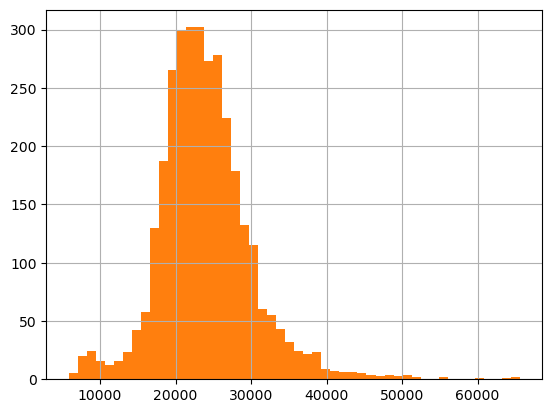

In [8]:
df['IncomePerCap'].hist(bins = 50)
plt.show()

### 1. Calculating descriptive statisctics

- Let's calculate basic descriptive statistics of the income per capita.

In [9]:
df['IncomePerCap'].describe()

count     3220.000000
mean     23981.771739
std       6204.339960
min       5878.000000
25%      20238.500000
50%      23460.000000
75%      27053.250000
max      65600.000000
Name: IncomePerCap, dtype: float64

- What distribution does the data come from? Here is how we can test the goodness of the fit.

In [11]:
# does the data come from a normal distrbution?
diagnostic.kstest_normal(df['IncomePerCap'].values, dist = 'norm')

(0.0637621121184162, 0.0009999999999998899)

- p_value < 0.05 -> we can reject the null hypothesis that the data comes from a normal distribution!

In [12]:
#how about exponential?
diagnostic.kstest_normal(df['IncomePerCap'].values, dist = 'exp')

(0.433243770582646, 0.0009999999999998899)

- p < 0.05 -> not exponential either!

### 2. How to sample the data

- Often we need to find random samples from the dataset. We can do so conveniently with pandas wrappers.

In [13]:
#make 10 samples with replacement
sample1_counties = df.sample(n = 10, replace = True)

#make 10 samples without replacement
sample1_counties = df.sample(n = 10, replace = False)

#sometimes we want to sample in an ublanaced way, so that we upsample datapoints of certain characteristic,
#and downsample the others. this can be acieved with weights parameter
#here we sample by upsampling counties with large population
sample2_counties = df.sample(n = 10, replace = False, weights = df['TotalPop'])

In [14]:
#on avergage, the samples in the sample produce with reveighting now have higher population, as we wanted!
print(sample1_counties['TotalPop'].mean())
print(sample2_counties['TotalPop'].mean())

64010.4
775422.8


### 3. Examining relationship between two variables

- Is income per capita of a county correlated with the unemployment?

In [15]:
stats.pearsonr(df['IncomePerCap'],df['Employed'])

PearsonRResult(statistic=0.2646136320394489, pvalue=9.942215354239015e-53)

- There is a small (0.26), but significant (p < 0.05) positive correlation.

In [16]:
stats.spearmanr(df['IncomePerCap'],df['Employed'])

SignificanceResult(statistic=0.30770631560595474, pvalue=1.415296431173735e-71)

- Spearman rank coorrelation is also significant.

### 4. Hypothesis testing

- Is income per capita higher in New York counties compared to California counties?

In [17]:
df.loc[df['State'] == 'New York']['IncomePerCap'].mean()

28189.75806451613

In [18]:
df.loc[df['State'] == 'California']['IncomePerCap'].mean()

27902.603448275862

- We see that there is a ~300$ gap. Quite a lot!
- But is it significantly higher? Let's use a t-test. This is a two-sided test for the null hypothesis that the two independent samples have identical average (expected) values. 

In [19]:
stats.ttest_ind(df.loc[df['State'] == 'New York']['IncomePerCap'], df.loc[df['State'] == 'California']['IncomePerCap'])

TtestResult(statistic=0.19788117232375713, pvalue=0.8434785239169611, df=118.0)

- p is not smaller than 0.05 -> we cannot reject the null hypothesis that the income is the same -> there is no significant difference

### 5. How to measure uncertainty
- Now we see the importance of mesuring uncertainty and indicating it on data visualizations.
- Visual inspection of 95% confidence intervals lets us see that the difference is not significant (the errorbars are overlapping).

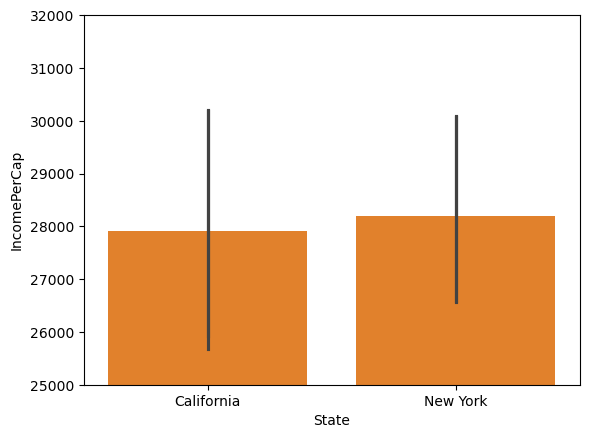

In [21]:
ax = sns.barplot(x="State", y="IncomePerCap", data=df.loc[df['State'].isin(['New York','California'])])
plt.ylim([25000,32000])
plt.show()

# Exercise 1: Boosting the economy by incentivizing self-employment

Assume the biggest priority of the local government in 2018 is to increase per-capita income. To do so, the officials plan to adopt a strategy for incentivizing self-employment through a series of campaigns, educational programs, and dedicated funds.

Since it is unethical and impossible in this setting to run a controlled experiment involving citizens (e.g., fire employees and force them to self-employ), the officials have asked you, the data scientist, to establish the effect of self-employment on the economy, relying on observational data.

**A)** Using suitable methods, determine and quantify the dependency between the percentage of self-employed citizens and per capita income across all 3,212 US counties. Do citizens in counties that have a higher percentage of self-employed people earn more per capita?

In [23]:
stats.pearsonr(df['IncomePerCap'],df['SelfEmployed'])

PearsonRResult(statistic=0.08727386609551786, pvalue=7.052861196524553e-07)

The p-value is smaller than  0.05 so we reject the null hypothesis which is the following:

Null Hypothesis (H₀): There is no linear relationship between the two variables.

If the null hypothesis is not rejected, it suggests that there is no evidence of a linear relationship between the variables.
If the null hypothesis is rejected, it suggests that there is a statistically significant linear relationship between the two variables (either positive or negative).

The correlation of the data, even though we are certain that it exists, it is weak. This is observed because of the slope of the correlation line (0.08727...). 

This means that even though citizens in counties that have a higher percentage of self-employed people earn more per capita, the do not increase with the same pace.

In [24]:
stats.spearmanr(df['IncomePerCap'],df['SelfEmployed'])

SignificanceResult(statistic=0.056413673053189874, pvalue=0.0013623847564714516)

The p-value is smaller than  0.05 so we reject the null hypothesis which is the following:

Null Hypothesis (H₀): There is no monotonic relationship between the two variables.

If the null hypothesis is not rejected, it suggests that there is no evidence of a monotonic relationship between the variables (increasing or decreasing).
If the null hypothesis is rejected, it suggests that there is a statistically significant monotonic relationship between the two variables (either positive or negative).

**B)** The pilot program will involve all counties within a limited set of three US states. Set A includes Wisconsin, Tennessee, and  Minnesota. Quantify the dependency of per-capita income on self-employment rates across all the counties in set A.

In [28]:
setA = df.loc[df['State'].isin(['Wisconsin','Tennessee', 'Minnesota'])]

stats.pearsonr(setA['IncomePerCap'],setA['SelfEmployed'])

PearsonRResult(statistic=-0.20229350736521498, pvalue=0.0011881639322138644)

In [29]:
stats.spearmanr(setA['IncomePerCap'],setA['SelfEmployed'])

SignificanceResult(statistic=-0.23669790001033852, pvalue=0.00014010090313655094)

In this case we notice that we reject once again the null hypothesis as the pvalue is smaller than 0.05.

However, in this case we observe that the data is correlated in a different way. As one quantity increases, the other one decreases (negative slope, equal to -0.202...)

**C)** In which state within set A is the observed effect of self-employment on per-capita income the strongest?

In [31]:
wisconsin = df.loc[df['State']=='Wisconsin']
tennessee = df.loc[df['State']=='Tennessee']
minnesota = df.loc[df['State']=='Minnesota']

wisc_pear = stats.pearsonr(wisconsin['IncomePerCap'],wisconsin['SelfEmployed'])
wisc_spear = stats.spearmanr(wisconsin['IncomePerCap'],wisconsin['SelfEmployed'])

ten_pear = stats.pearsonr(tennessee['IncomePerCap'],tennessee['SelfEmployed'])
ten_spear = stats.spearmanr(tennessee['IncomePerCap'],tennessee['SelfEmployed'])

minnes_pear = stats.pearsonr(minnesota['IncomePerCap'],minnesota['SelfEmployed'])
minnes_spear = stats.spearmanr(minnesota['IncomePerCap'],minnesota['SelfEmployed'])

print(f"Pearson stats for each State (Pearson, Spearman):\n")
print(f"Wisconsin: {wisc_pear, wisc_spear}")
print(f"Tennessee: {ten_pear, ten_spear}")
print(f"Minnesota: {minnes_pear, minnes_spear}")

Pearson stats for each State (Pearson, Spearman):

Wisconsin: (PearsonRResult(statistic=-0.32905300016378525, pvalue=0.004768134887745218), SignificanceResult(statistic=-0.4635129104404941, pvalue=4.124859155565996e-05))
Tennessee: (PearsonRResult(statistic=-0.23836048684913147, pvalue=0.020011631955528107), SignificanceResult(statistic=-0.316991392780988, pvalue=0.0017487582457931406))
Minnesota: (PearsonRResult(statistic=-0.2538551921654062, pvalue=0.01766519930091188), SignificanceResult(statistic=-0.21107460598245847, pvalue=0.04970805582462062))


The state, in which the observed effect is the strongest is Wisconsin as the 1st parameter is bigger compared to the 2 other states. This mean that there is a stronger correlation, so an increase of one quality leads to a higher decrease of the other one in Wisconsin.

**D)** Set B includes New Jersey, Kansas, and Rhode Island. Repeat the analysis from steps B and C above, but now for set B. In which of the two sets A and B (if any) would you recommend incentivizing self-employment? Explain your reasoning. Hint: It is useful to add a notion of confidence to your results and explore the data visually.

In [34]:
setB = df.loc[df['State'].isin(['New Jersey', "Kansas", "Rhode Island"])]

stats.pearsonr(setB['IncomePerCap'],setB['SelfEmployed'])

PearsonRResult(statistic=-0.2322214134608569, pvalue=0.0076074930428573165)

In [35]:
stats.spearmanr(setB['IncomePerCap'],setB['SelfEmployed'])

SignificanceResult(statistic=-0.16010624610827853, pvalue=0.06773890774775308)

In [38]:
newjersey = df.loc[df['State']=='New Jersey']
kansas = df.loc[df['State']=='Kansas']
rhode = df.loc[df['State']=='Rhode Island']

newj_pear = stats.pearsonr(newjersey['IncomePerCap'],newjersey['SelfEmployed'])
newj_spear = stats.spearmanr(newjersey['IncomePerCap'],newjersey['SelfEmployed'])

kans_pear = stats.pearsonr(kansas['IncomePerCap'],kansas['SelfEmployed'])
kans_spear = stats.spearmanr(kansas['IncomePerCap'],kansas['SelfEmployed'])

rhode_pear = stats.pearsonr(rhode['IncomePerCap'],rhode['SelfEmployed'])
rhode_spear = stats.spearmanr(rhode['IncomePerCap'],rhode['SelfEmployed'])

print(f"Pearson stats for each State (Pearson, Spearman):\n")
print(f"New Jersey: {newj_pear, newj_spear}")
print(f"Kansas: {kans_pear, kans_spear}")
print(f"Rhode Island: {rhode_pear, rhode_spear}")

Pearson stats for each State (Pearson, Spearman):

New Jersey: (PearsonRResult(statistic=0.48044784713362815, pvalue=0.027488944757806215), SignificanceResult(statistic=0.4040346017736601, pvalue=0.06929493068926951))
Kansas: (PearsonRResult(statistic=0.2581029971443692, pvalue=0.007853351846832411), SignificanceResult(statistic=0.28392575483491556, pvalue=0.0033332825399419903))
Rhode Island: (PearsonRResult(statistic=0.9021788382149805, pvalue=0.036183102015759167), SignificanceResult(statistic=0.9999999999999999, pvalue=1.4042654220543672e-24))


I would motivate self employment in New Jersey, Kansas and Rhode Island as we observe a positive and in the case od Rhode Island a very high correlation between the income and the self employment.

# Exercise 2. Data visualization and read the stats comprehension and interpretation questions.

- As part of the quizes, two homeworks and the final exam, you will be at times asked to interpret your result based on the understanding of underlying concepts. The questions below can help you practice and get a sense of how well you understand the concepts covered in the class so far. Can you answer these questions confidently?

### Question 1. The yearly salaries (in thousands of CHF) of 7000 people are summarized in the following box plot. If the 20th percentile of the salaries is 110,000, how many people earn between 110,000 and 114,000?

- a) 2100
- b) 700
- c) 350
- d) 70

<img src="boxplot.png" style="width: 400px;" align="left"/>

We know that the 20th percentile of the salaries is 110,000. By the definition of box plots, we know that the left edge of the box represents the 1st quartile (25%) and it seems to be at 114,000.
This mean that about 5% (25%-20%) of the 7000 people earn between 110,000 and 114,000.

This gives us that the right answer is c.

In [39]:
print(5/100 * 7000)

350.0


### Question 2. What visualizations are suitable for getting insights about the distribution of a single continuous variable?

- a) Barplot and histogram
- b) Boxplot and histogram
- c) Scatterplot and boxplot
- d) Barplot, boxplot, and histogram

The right answer is b as:
Histogram:
Displays the frequency of data points within different bins.
Helps in visualizing the shape of the distribution (e.g., normal, skewed, etc.), spread, and presence of outliers.
Boxplot:
Summarizes the distribution through its five-number summary: minimum, 25th percentile (Q1), median, 75th percentile (Q3), and maximum.
Highlights outliers, spread, and skewness of the data.

### Question 3. In a new groundbreaking study, 28 out of 100 patients reported improvements after taking a new medicine. It is known that, when given a placebo, 20% of the patients report feeling better. What is the p-value assuming the null hypothesis that the probability of successful treatment in this groundbreaking study is the same as the probability of reporting feeling better under placebo, according to a one-sided binomial test? Hint: you may use the statsmodels.stats.proportion.binom_test function.

- a) 0.00034
- b) 0.0034
- c) 0.034
- d) 0.34

- Number of successes (patients reporting improvement) = 28
- Total number of trials (patients in the study) = 100
- Null hypothesis (probability of success) = 20% (the same as the placebo rate)
We are asked to perform a one-sided test.
The null hypothesis states that the success rate under the new medicine is no better than under the placebo (20%).

In [40]:
from statsmodels.stats.proportion import binom_test

# Observed number of successes
successes = 28
# Total number of patients
n = 100
# Null hypothesis probability of success (placebo rate)
p_null = 0.20

# Perform one-sided binomial test
p_value = binom_test(successes, n, p_null, alternative='larger')
print(p_value)


0.03415162963907485


The right answee as we can see is c

What does this mean?
This means that we are going to reject the null hypothesis, because the p-values is less than 0.05.
Rejecting the null hypothesis leads us to conclusion that the success rate under the new medicine is better than under the placebo.

### Question 4. The 95% confidence interval of the average height of 1000 people using bootstrap resampling with 10000 bootstrap samples is calculated by:

- a) Sampling 1000 height values with replacement and computing the mean. This is repeated 10000 times to create a sorted list of the 10000 means. The CI is defined by the 500th and the 9500th value in sorted order.
- b) Sampling 10000 height values without replacement and computing the mean. This is repeated 1000 times to create a sorted list of the 1000 means. The CI is defined by the 25th and the 975th value in sorted order.
- c) Sampling 1000 height values with replacement and computing the mean. This is repeated 10000 times to create a sorted list of the 10000 means. The CI is defined by the 250th and the 9750th value in sorted order.
- d) Sampling 1000 height values without replacement and computing the mean. This is repeated 10000 times to create a sorted list of the 10000 means. The CI is defined by the 500th and the 9500th value in sorted order.

### Implement your bootstrapping function that you will use in the rest of the course. It should take an array and the number of iterations as inputs, and output 95% confidence intervals of the mean.

The right answer is c

Why Option c?
- Sampling with replacement is crucial because bootstrap resampling involves drawing random samples with replacement from the original dataset.
- The 10000 iterations correspond to the number of bootstrap resamples.
- The 95% CI is determined by the 2.5th percentile and 97.5th percentile, which corresponds to the 250th and 9750th values in a sorted list of 10000 resampled means.


In [41]:
import numpy as np

def bootstrap_ci(data, iterations=10000, ci=95):
    """
    Perform bootstrap resampling to compute the confidence interval of the mean.
    
    Parameters:
    data (array): Array of observed data points.
    iterations (int): Number of bootstrap samples (default is 10000).
    ci (float): Confidence level (default is 95%).
    
    Returns:
    tuple: Lower and upper bounds of the confidence interval.
    """
    # Array to store the means of each bootstrap sample
    bootstrap_means = []
    
    # Bootstrap resampling
    for _ in range(iterations):
        # Sample 'data' with replacement
        sample = np.random.choice(data, size=len(data), replace=True)
        # Compute and store the mean of this bootstrap sample
        bootstrap_means.append(np.mean(sample))
    
    # Sort the bootstrap means
    sorted_means = np.sort(bootstrap_means)
    
    # Calculate the percentiles for the desired CI
    lower_percentile = (100 - ci) / 2
    upper_percentile = 100 - lower_percentile
    
    # Find the lower and upper bounds of the CI
    lower_bound = np.percentile(sorted_means, lower_percentile)
    upper_bound = np.percentile(sorted_means, upper_percentile)
    
    return lower_bound, upper_bound

# Example usage with hypothetical height data
data = np.random.normal(loc=170, scale=10, size=1000)  # Simulated height data (mean=170cm, std=10cm)
ci_lower, ci_upper = bootstrap_ci(data)
print(f"95% Confidence Interval: [{ci_lower:.2f}, {ci_upper:.2f}]")


95% Confidence Interval: [169.53, 170.77]


### Question 5. A study conducted at EPFL revealed a negative Spearman’s correlation between GPA and entry-level job salary. Which of the following statements is true?

- a) There could be a positive Spearman’s correlation between GPA and entry-level job salary in every single department of EPFL.
- b) Spearman correlation between GPA and entry-level job salary in every single department has to be positive.
- c) Across all levels, as opposed to entry-level only, higher GPA scores are associated with higher job salaries.
- d) We can infer that finishing EPFL with a higher GPA causes you to have a lower entry-level job salary.

Ask TAs

### Question 6. The average number of requests per page during a day on a large website is 200, while the median is 15. 

- a) You can assume that the distribution is heavy-tailed.
- b) You are dealing with a left-skewed distribution.
- c) Half of the pages get more than 200 requests.
- d) None of the above.

Why (a) You can assume that the distribution is heavy-tailed is correct:
- A heavy-tailed distribution has a few extremely large values (outliers) that significantly increase the mean, while most of the data points are concentrated around lower values (hence the low median).
- In this case, the fact that the mean is much higher than the median suggests that some pages get an extremely high number of requests, pulling the mean up. This is typical of a heavy-tailed or right-skewed distribution, where a small number of pages receive a very large number of requests, but the majority of pages receive far fewer.